In [ ]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv(r"D:\Projects\brca\data\fineneedleaspirationData.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df["diagnosis"].value_counts()

In [ ]:
df.isnull().sum()


In [ ]:
#Data is already clean and filled with no missing values.

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.head() #mapped properly

In [ ]:
df = df.drop(columns=['id'])

In [ ]:
df = df.drop(columns=['Unnamed: 32'])

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df["diagnosis"].value_counts()

In [ ]:
#1 is for Malignant, 0 is for Benign

In [ ]:
df.groupby('diagnosis').mean()

In [ ]:
df.isnull().sum()


#Building a simple NN

In [ ]:
df.groupby("diagnosis").mean()

In [ ]:
X = df.drop(columns="diagnosis", axis = 1)
y = df["diagnosis"]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=2)

In [ ]:
#STANDARDIZATION FOR BETTER ACCURACY
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test) #donot FIT to TEST, only with TRAIN

#Also, y train and ytest are categorical variables so no transform needed.

In [ ]:
X_train_std

#Neural Network

A NN will have multiple layers. Input layer is where we input the features, output layer is where we get output and middle layer(s) or Hidden layers can be 10 or even 100.
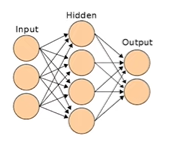

In [ ]:
#Importing TENSOR FLOW and KERAS for Deep Learning

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras

TensorFlow ensures reproducibility

Sets the random seed to 3. This ensures that operations involving randomness (like weight initialization, shuffling, etc.) will produce the same results every time you run the code, which is crucial for debugging or comparison.

In [ ]:
#Building the 3 layers of my NN:
#Building the 3 layers of my NN:

model = keras.Sequential([
                        keras.layers.Flatten(input_shape= (30,)), #First/Input layer. Remember to put comma after each layer

                        keras.layers.Dense(20, activation='relu'), #Hidden layer 1

                        #Hidden layer 2 etc.... Like this we can add more layers

                        keras.layers.Dense(2, activation='sigmoid') #Output layer
])


Now, the X train splits are basically matirces. But for NN, we need to convert them into 1D array such that each feature will go to one neuron. This is where FLATTEN is used.

Why act = 20 neurons for hidden? Any is fine.

Why act = 2 for output layer? Because we only have 2 classes: 1 (cancer) or 0 (no cancer)

Thus, ultimately there will only be 2 neurons in the op layer.

In [ ]:
#Compiling Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

sparse_categorical_crossentropy is used when we have lables like 1, 2 or 3 or 0

In [ ]:
#TRAINING THE NN

history = model.fit(X_train_std, y_train, validation_split = 0.1, epochs=10)
#validation is like 10% data for validation. Epoch is how many times the model has to go through the data
#after standardisation, we get Good accuracy. Now we can again play with attributes like increase neuron number from 20 etc

VISUALISING accuracy and loss

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(["training data", "validation data"], loc = 'lower right')

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.legend(["training data", "validation data"], loc = 'upper right')

Accuracy of model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

#BUILD PREDICTIVE SYSTEM for NN

In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

In [ ]:
y_pred = model.predict(X_test_std)

In [ ]:
print(y_pred.shape)
print(y_pred[0])
#so basically it gives probability that it is 0 or 1, not 0 or 1 itself

In [ ]:
print(X_test_std)
print(y_pred)

In [ ]:
#argmax function example

my_list = [10, 20, 30]
indexofmaxvalue = np.argmax(my_list)
print(my_list)
print(indexofmaxvalue)


In [ ]:
#argmax function another example

my_list = [0.56, 0.25, 3.0]
indexofmaxvalue = np.argmax(my_list)
print(my_list)
print(indexofmaxvalue)


In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

#Building the predictive system


In [ ]:
input_data = (14.54,27.54,96.73,658.8,0.1139,0.1595,0.1639,0.07364,0.2303,0.07077,0.37,1.033,2.879,32.55,0.005607,0.0424,0.04741,0.0109,0.01857,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.1341)

#change the  ip data from tuple to np.array
input_data_as_array = np.asarray(input_data)

#reshape the array as we are predicting for only one datapoint
array_reshaped = input_data_as_array.reshape(1,-1)

#transform this new input data using standard scalar
array_std = scaler.transform(array_reshaped)

#prediction
prediction = model.predict(array_std)
print(prediction)

prediction_label= [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] ==0):
  print("The tumor is Benign")
else:
  print("The tumor is Malignant")

In [ ]:
input_data = (8.671,14.45,54.42,227.2,0.09138,0.04276,0,0,0.1722,0.06724,0.2204,0.7873,1.435,11.36,0.009172,0.008007,0,0,0.02711,0.003399,9.262,17.04,58.36,259.2,0.1162,0.07057,0,0,0.2592,0.07848)

#change the  ip data from tuple to np.array
input_data_as_array = np.asarray(input_data)

#reshape the array as we are predicting for only one datapoint
array_reshaped = input_data_as_array.reshape(1,-1)

#transform this new input data using standard scalar
array_std = scaler.transform(array_reshaped)

#prediction
prediction = model.predict(array_std)
print(prediction)

prediction_label= [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] ==0):
  print("The tumor is Benign")
else:
  print("The tumor is Malignant")